In [32]:
import tensorflow as tf
import numpy as np

In [33]:
from tensorflow.keras.utils import to_categorical

(xtrain, ytrain), (xtest, ytest) = tf.keras.datasets.mnist.load_data()

5
(60000, 10)


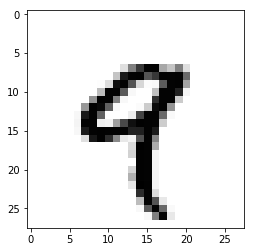

In [34]:
import matplotlib.pyplot as plt

print(ytrain[0])
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)
print(ytrain.shape)

plt.imshow(xtrain[4], cmap='Greys')

In [35]:
import tensorflow as tf

learning_rate = 0.001
iters = 20000
batch_size = 128
display_step = 10

n_input = 784
n_classes = 10
dropout = 0.75

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

def conv_net(x, weights, biases, dropout):
    
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    conv1 = conv2d(x, weights['wc1'], biases['bc1'])

    conv1 = maxpool2d(conv1, k=2)

    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])

    conv2 = maxpool2d(conv2, k=2)

    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    fc1 = tf.nn.dropout(fc1, dropout)

    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = conv_net(x, weights, biases, keep_prob)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred, labels = y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.initializers.global_variables()


Iteration 1280, Accuracy = 0.32812
Iteration 2560, Accuracy = 0.35938
Iteration 3840, Accuracy = 0.65625
Iteration 5120, Accuracy = 0.76562
Iteration 6400, Accuracy = 0.76562
Iteration 7680, Accuracy = 0.82812
Iteration 8960, Accuracy = 0.72656
Iteration 10240, Accuracy = 0.81250
Iteration 11520, Accuracy = 0.87500
Iteration 12800, Accuracy = 0.86719
Iteration 14080, Accuracy = 0.82812
Iteration 15360, Accuracy = 0.87500
Iteration 16640, Accuracy = 0.90625
Iteration 17920, Accuracy = 0.88281
Iteration 19200, Accuracy = 0.89062
Finished
Test Accuracy :  0.92578125
7


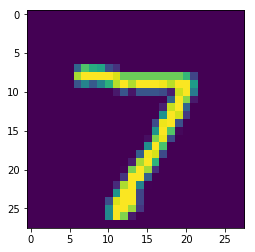

In [37]:
with tf.Session() as sess:
    sess.run(init)
    step = 1
    while step * batch_size < iters:
        x_batch = np.array(xtrain[(step-1)*batch_size : step*batch_size, : ])
        x_batch = np.reshape(x_batch, (-1, 784))
        y_batch = ytrain[(step-1)*batch_size : step*batch_size]
        sess.run(optimizer, feed_dict = {x: x_batch, y: y_batch, keep_prob: dropout})
        if step % display_step == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict = {x: x_batch, y: y_batch, keep_prob: 1})
            print("Iteration " + str(step*batch_size) + ", Accuracy = {:.5f}".format(acc))
        step += 1
    print("Finished")
    x_test = np.reshape(xtest, (-1, 784))
    print("Test Accuracy : ", sess.run(accuracy, feed_dict = {x : x_test[:256], y : ytest[:256], keep_prob : 1}))
    
    predictions = sess.run(pred, feed_dict = {x : x_test[:256], y : ytest[:256], keep_prob : 1})
    
    plt.imshow(xtest[0])
    print(np.argmax(predictions[0]))
    #print(tf.keras.backend.eval(tf.argmax(predictions[0])))

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)